# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 817 kB/s eta 0:00:01    |██                              | 2.4 MB 817 kB/s eta 0:00:43
     |████████████████████████████████| 19.3 MB 53.8 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 66.0 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 69.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 47.7 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 61.2 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 72.6 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 68.2 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 68.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 63.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.9 MB/s eta 0:00:01
     |█████████████████████

     |████████████████████████████████| 93 kB 2.7 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=e481cda513440ba1fcc075890515727b5641501b6bc96db300c8db9711e92950
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [45]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [46]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [47]:
# Define transforms
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transforms)
test_loader = DataLoader(test_data, batch_size=100)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

This transform was chosen to convert the image data set to tensor with numbers between 0 and 1. Normalization is done with (0.5,) as mean and (0.5,) as standard deviation such that it helps in optimizing the process.
No resizing or rotation is required in this case.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [48]:
print("Size of training data: ", len(train_data))
print("Size of test data: ", len(test_data))

Size of training data:  60000
Size of test data:  10000


In [49]:
train_dim = next(iter(train_loader))[0][0]
test_dim = next(iter(test_loader))[0][0]

print("Shape of a single training example: ", train_dim.shape)
print("Shape of a single test example: ", test_dim.shape)

Shape of a single training example:  torch.Size([1, 28, 28])
Shape of a single test example:  torch.Size([1, 28, 28])


In [50]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

0


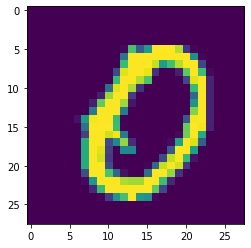

6


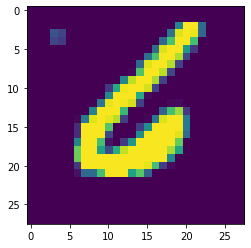

2


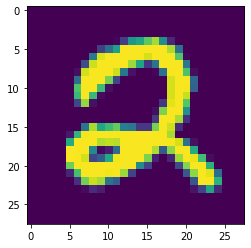

6


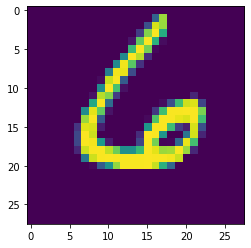

1


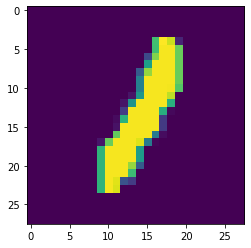

In [51]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        x = F.softmax(x, dim=1)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [53]:
net = Net()

optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [54]:
net.to(device)

Net(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
)

In [55]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

Epoch 1 training accuracy: 82.30% training loss: 1.65872
Epoch 2 training accuracy: 91.16% training loss: 1.55431
Epoch 3 training accuracy: 92.43% training loss: 1.53985
Epoch 4 training accuracy: 93.44% training loss: 1.52865
Epoch 5 training accuracy: 94.07% training loss: 1.52218
Epoch 6 training accuracy: 94.98% training loss: 1.51314
Epoch 7 training accuracy: 95.36% training loss: 1.50908
Epoch 8 training accuracy: 95.78% training loss: 1.50453
Epoch 9 training accuracy: 96.04% training loss: 1.50155
Epoch 10 training accuracy: 96.41% training loss: 1.49852


Plot the training loss (and validation loss/accuracy, if recorded).

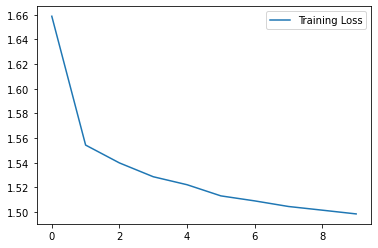

In [56]:
# Plot the training loss history
plt.plot(train_loss_history, label="Training Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [57]:
net.eval()

correct_predictions = 0
total_predictions = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = net(inputs)
        
        # Get predictions
        _, preds = torch.max(outputs, 1)
        
        # Update total and correct predictions
        total_predictions += labels.size(0)
        correct_predictions += (preds == labels).sum().item()

# Calculate accuracy
accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 96.49%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [65]:
class Net_v2(nn.Module):
    def __init__(self):
        super(Net_v2, self).__init__()
        self.activation = F.relu     
        # Increase units in the hidden layer
        self.layer1 = nn.Linear(28 * 28, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 10)
        # Added dropout
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        # Apply first layer, activation, and dropout
        x = self.activation(self.layer1(x))
        x = self.dropout(x)        
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        x = F.softmax(x, dim=1)
        return x

In [66]:
net_model2 = Net_v2()

# Added weight_decay parameter
optimizer = optim.Adam(net_model2.parameters(), lr=0.001, weight_decay=0.0001)
criterion = nn.CrossEntropyLoss()

In [67]:
net_model2.to(device)

Net_v2(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [68]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net_model2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net_model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

Epoch 1 training accuracy: 81.66% training loss: 1.65505
Epoch 2 training accuracy: 92.03% training loss: 1.54508
Epoch 3 training accuracy: 93.80% training loss: 1.52578
Epoch 4 training accuracy: 94.59% training loss: 1.51761
Epoch 5 training accuracy: 95.13% training loss: 1.51188
Epoch 6 training accuracy: 95.61% training loss: 1.50689
Epoch 7 training accuracy: 95.79% training loss: 1.50445
Epoch 8 training accuracy: 95.80% training loss: 1.50476
Epoch 9 training accuracy: 96.14% training loss: 1.50097
Epoch 10 training accuracy: 96.16% training loss: 1.50083


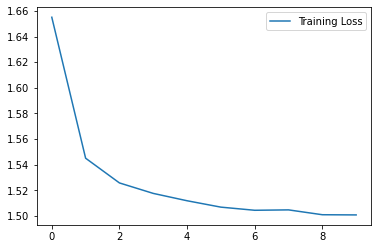

In [69]:
# Plot the training loss history
plt.plot(train_loss_history, label="Training Loss")
plt.legend()
plt.show()

In [72]:
net_model2.eval()

correct_predictions = 0
total_predictions = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = net_model2(inputs)
        
        # Get predictions
        _, preds = torch.max(outputs, 1)
        
        # Update total and correct predictions
        total_predictions += labels.size(0)
        correct_predictions += (preds == labels).sum().item()

# Calculate accuracy
accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 96.54%


The model accuracy went from 96.49% to 96.54%. On tweaking the hyperparameters, it led to slight improvement of model accuracy.

## Saving your model
Using `torch.save`, save your model for future loading.

In [71]:
torch.save(Net, "Net.pth")
torch.save(Net_v2, "Net_v2.pth")